**Exploratory Data Analysis**

In [2]:
import pandas as pd
data = pd.read_csv("train.csv")
data.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


                 id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000
Negative Tweets:  2242
Positive Tweets:  29720


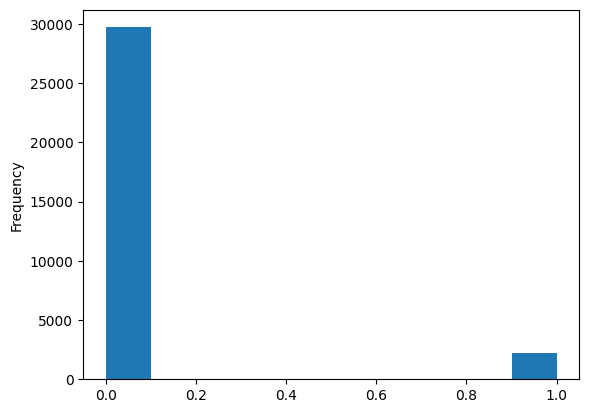

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data['label'].plot(kind='hist')
print(data.describe())
Negative_Tweets = data['label'].value_counts()[1]
print("Negative Tweets: ", Negative_Tweets)
Positive_Tweets = data['label'].value_counts()[0]
print("Positive Tweets: ", Positive_Tweets)


**Pre-Processing**

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Here stop words such as, "a" "and" "it" "our", are taken out to make the clustering analysis easier.

In [5]:
def stop_words_removal(data):
    data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    print(data['tweet'].head())

stop_words_removal(data)

0    @user father dysfunctional selfish drags kids ...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object


Here words that are spelt incorrectly are made as correct as possible by the TextBlob package

In [8]:
from textblob import TextBlob
def spell_correction(data):
    return data['tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

spell_correction(data)

0    @user father dysfunctional selfish drags kiss ...
1    @user @user thanks #left credit can't use caus...
2                                       midday majesty
3    #model love u take u time or±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object

Here we are taking out suffixes of words like "-ly", "-ing". So that our analysis can be more consistent when it comes to different words.

In [9]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
def stemming(data):
    return data['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
stemming(data)

0    @user father dysfunct selfish drag kid dysfunc...
1    @user @user thank #lyft credit can't use caus ...
2                                       bihday majesti
3    #model love u take u time urð±!!! ððð...
4                           factsguide: societi #motiv
Name: tweet, dtype: object

To get even closer to analyzing the words in the base form we will use lemmatization.

In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
from textblob import Word
def lemmatization(data):
    data['tweet'] = data['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print(data['tweet'].head())
lemmatization(data)

data.head(10)

0    @user father dysfunctional selfish drag kid dy...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object


,id,label,tweet
0,1,0,@user father dysfunctional selfish drag kid dy...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urð±!!! ððð...
4,5,0,factsguide: society #motivation
5,6,0,[2/2] huge fan fare big talking leave. chaos p...
6,7,0,@user camping tomorrow @user @user @user @user...
7,8,0,next school year year exams.ð¯ can't think ð...
8,9,0,won!!! love land!!! #allin #cavs #champions #c...
9,10,0,@user @user welcome ! i'm #gr8 !


**Advanced Text Processing**

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In this process our dataset will be compartmentalized into a series of n words that are related to the starting word of the selected tweet. After that a word from the prievious list will be matched with another tweet with similar features.

In [19]:
def combination_of_words(df):
    return (TextBlob(df['tweet'][10]).ngrams(3))
combination_of_words(data)

[WordList(['â\x86\x9d', 'ireland', 'consumer']),
 WordList(['ireland', 'consumer', 'price']),
 WordList(['consumer', 'price', 'index']),
 WordList(['price', 'index', 'mom']),
 WordList(['index', 'mom', 'climbed']),
 WordList(['mom', 'climbed', 'previous']),
 WordList(['climbed', 'previous', '0.2']),
 WordList(['previous', '0.2', '0.5']),
 WordList(['0.2', '0.5', 'may']),
 WordList(['0.5', 'may', 'blog']),
 WordList(['may', 'blog', 'silver']),
 WordList(['blog', 'silver', 'gold']),
 WordList(['silver', 'gold', 'forex'])]

We will now calculate the TF-IDF, this is a calculation for term frequency (TF, the number of times a term appears in a tweet / number of terms in a tweet) and inverse document frequency (IDF, the log of the ratio of the total number of rows to the number of rows in which that word is present)

In [26]:
tf1 = (data['tweet'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,@user,2
1,thanks,1
2,#lyft,1
3,credit,1
4,can't,1
5,use,1
6,cause,1
7,offer,1
8,wheelchair,1
9,van,1


In [28]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['tweet'].str.contains(word)])))
tf1

,words,tf,idf
0,@user,2,1.055263
1,thanks,1,4.597751
2,#lyft,1,9.273691
3,credit,1,7.327781
4,can't,1,3.753564
5,use,1,1.006242
6,cause,1,5.610129
7,offer,1,6.522155
8,wheelchair,1,9.273691
9,van,1,5.236505


In [29]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,@user,2,1.055263,2.110526
1,thanks,1,4.597751,4.597751
2,#lyft,1,9.273691,9.273691
3,credit,1,7.327781,7.327781
4,can't,1,3.753564,3.753564
5,use,1,1.006242,1.006242
6,cause,1,5.610129,5.610129
7,offer,1,6.522155,6.522155
8,wheelchair,1,9.273691,9.273691
9,van,1,5.236505,5.236505


TF - number of times the term occurs in the tweet

IDF - a number to identify how unique the words is, greater value means more unique

TFIDF - this is convient number to have that shows the importance of the word for the given document

In [47]:
def polarity_subjectivity(data):
    return data['tweet'][:100].apply(lambda x: TextBlob(x).sentiment)
polarity_subjectivity(data)

0                     (-0.3, 0.5354166666666667)
1                                     (0.2, 0.2)
2                                     (0.0, 0.0)
3                               (0.9765625, 0.6)
4                                     (0.0, 0.0)
                         ...                    
95                                    (0.0, 0.0)
96                              (0.9765625, 0.6)
97                                    (0.0, 0.2)
98                                    (0.0, 0.0)
99    (0.32499999999999996, 0.42500000000000004)
Name: tweet, Length: 100, dtype: object

This will give us the power of the emotion of the tweet.

In [81]:
def sentiment_analysis(data):
    data['sentiment'] = data['tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
    return data[['tweet','sentiment']]
Master = sentiment_analysis(data)
Master

,tweet,sentiment
0,@user father dysfunctional selfish drag kid dy...,-0.300000
1,@user @user thanks #lyft credit can't use caus...,0.200000
2,bihday majesty,0.000000
3,#model love u take u time urð±!!! ððð...,0.976562
4,factsguide: society #motivation,0.000000
...,...,...
31957,ate @user isz youuu?ððððððð...,0.000000
31958,see nina turner airwave trying wrap mantle gen...,0.400000
31959,listening sad song monday morning otw work sad,-0.500000
31960,"@user #sikh #temple vandalised #calgary, #wso ...",0.000000


In [110]:
new_Master_copy = Master.copy()

new_Master_copy['Related'] = ''
list = []
for s in Master['tweet']:
  if 'father' in s.lower():
    list.append(1)
  else:
    list.append(0)

list.count(1)

new_Master_copy['Related'] = list


Here we are simply grouping all the related tweets together and looking at the ones with the strongest sentiment to see if there are more relations

In [117]:
new_Master_copy.head()
father_tweets = new_Master_copy[(new_Master_copy.Related == 1)]
father_tweets.sort_values(by=['sentiment'])

,tweet,sentiment,Related
7804,bloody mary's father day!!! bring dad tomorrow...,-1.00,1
10427,father lying ass. #terrorism #homophobia #orla...,-0.85,1
28438,"r thing hate, one them...do keep #fathersday #...",-0.80,1
28728,dont hate watz hate wats #sauce #saucegod fath...,-0.80,1
18265,@user u knw: hisð @user father slapped doct...,-0.70,1
...,...,...,...
21579,happy father's day! #trulyblessed #fathersday ...,1.00,1
2572,"#bihday mentor,a guide,an excellent leader gen...",1.00,1
29201,lol since u complaining ð father's day !!,1.00,1
18825,wishing happy father day! #fathersday #dad #su...,1.00,1
